# Activating Your First Neural Network

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Import Sequential and Dense from Tensorflow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Using a Single Neuron for Binary Classification

### Creating Dummy Data

In [3]:
# Generate 1000 demo data samples with 3 input features
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=1)

In [4]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2", "Feature 3"])
df["Target"] = y
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,1.204021,1.079919,-1.325340,1
1,-0.654067,-0.907734,0.969726,0
2,-0.015626,0.242246,-0.182132,1
3,0.851587,0.971028,-1.098577,1
4,-1.447166,-1.162969,1.487949,0


### Data Preprocessing

Use `train_test_split` to create training and testing data.

In [5]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

 Scale the data using the `StandarScaler`.

In [6]:
# Create scaler instance
X_scaler = StandardScaler()

In [7]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [8]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Neural Network Model Creation

In [9]:
# Create a sequential model
neuron = Sequential()

#### Add the first layer of our neural network.

In [11]:
# First layer
number_inputs = 3
number_hidden_nodes = 6

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

#### We finish creating our neural network by adding the output layer.

In [13]:
# Output layer
output_nodes = 1

neuron.add(Dense(units=output_nodes, activation="sigmoid"))

In [14]:
# Model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


 ### Compile the Model

In [16]:
# Compile model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

 ### Fit the Model

In [17]:
# Fitting the model with linear dummy data
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7449 - accuracy: 0.5120
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7321 - accuracy: 0.5120
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7221 - accuracy: 0.5120
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7140 - accuracy: 0.5120
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.5120
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7007 - accuracy: 0.5120
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5120
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5120
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5120
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5120
Epoch 11/

 ### Evaluate the Model

 #### Plotting the Loss Function and Accuracy

<AxesSubplot:>

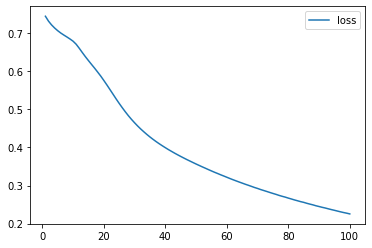

In [18]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

<AxesSubplot:>

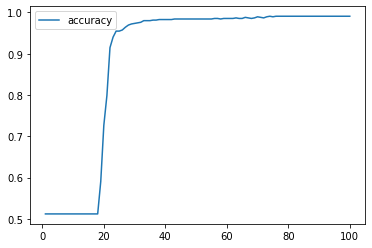

In [19]:
# Plot the accuracy
df.plot(y="accuracy")

 #### Evaluating the Model Using Testing Data

In [20]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.2260 - accuracy: 0.9920 - 212ms/epoch - 26ms/step
Loss: 0.2260092943906784, Accuracy: 0.9919999837875366


 ### Making Predictions

In [21]:
# Making predictions
predictions = (neuron.predict(X_test_scaled) > 0.5).astype("int32")
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test.ravel()})
results.head(10)

8/8 [==============================] - 0s 1ms/step


,predictions,actual
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
5,1,1
6,0,0
7,1,1
8,1,1
9,1,1
